Published on October 03, 2023. By Marília Prata, mpwolke.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [3]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\2021i\Downloads\skin\Dataset\train",  # Path to training data directory
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    r"C:\Users\2021i\Downloads\skin\Dataset\test",  # Path to testing data directory
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

Found 2591 images belonging to 17 classes.
Found 892 images belonging to 17 classes.


#Number of classes check above

In [4]:
path = r"C:\Users\2021i\Downloads\skin\Dataset\train\\" 

In [5]:
class_names = sorted(os.listdir(path))
num_classes = len(class_names)

img_size = (192, 192, 3)

print('classes: ', class_names,len(class_names))

classes:  ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Vascular Tumors', 'Warts Molluscum and other Viral Infections'] 17


#Epochs

In [6]:
#CRN4TWW https://www.kaggle.com/code/crn4tww/dog-emotions-classifier

import cv2

labels = []
images = []

print('images:\n')
for cl in class_names:
    print(cl, end=' -> ')
    for img in os.listdir(path + cl):
        label = np.zeros(num_classes)
        label[class_names.index(cl)] = 1
        labels.append(label)
        
        image = np.asarray(cv2.resize(cv2.imread(path + cl + '/' + img, cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1])#That line remove Blue
        
        #image = np.asarray(cv2.resize(cv2.imread(data_path + cl + '/' + img, cv2.COLOR_BGR2RGB), img_size[0:2]))
        images.append(image)
    print('done')

    
labels = np.asarray(labels)
images = np.asarray(images)

print(f'\n\nlabels shape: {labels.shape}')
print(f'images shape: {images.shape}')

images:

Acne and Rosacea Photos -> done
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions -> done
Atopic Dermatitis Photos -> done
Cellulitis Impetigo and other Bacterial Infections -> done
Eczema Photos -> done
Exanthems and Drug Eruptions -> done
Herpes HPV and other STDs Photos -> done
Light Diseases and Disorders of Pigmentation -> done
Lupus and other Connective Tissue diseases -> done
Melanoma Skin Cancer Nevi and Moles -> done
Poison Ivy Photos and other Contact Dermatitis -> done
Psoriasis pictures Lichen Planus and related diseases -> done
Seborrheic Keratoses and other Benign Tumors -> done
Systemic Disease -> done
Tinea Ringworm Candidiasis and other Fungal Infections -> done
Vascular Tumors -> done
Warts Molluscum and other Viral Infections -> done


labels shape: (2591, 17)
images shape: (2591, 192, 192, 3)


In [7]:
class_names

['Acne and Rosacea Photos',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Atopic Dermatitis Photos',
 'Cellulitis Impetigo and other Bacterial Infections',
 'Eczema Photos',
 'Exanthems and Drug Eruptions',
 'Herpes HPV and other STDs Photos',
 'Light Diseases and Disorders of Pigmentation',
 'Lupus and other Connective Tissue diseases',
 'Melanoma Skin Cancer Nevi and Moles',
 'Poison Ivy Photos and other Contact Dermatitis',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Seborrheic Keratoses and other Benign Tumors',
 'Systemic Disease',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Vascular Tumors',
 'Warts Molluscum and other Viral Infections']

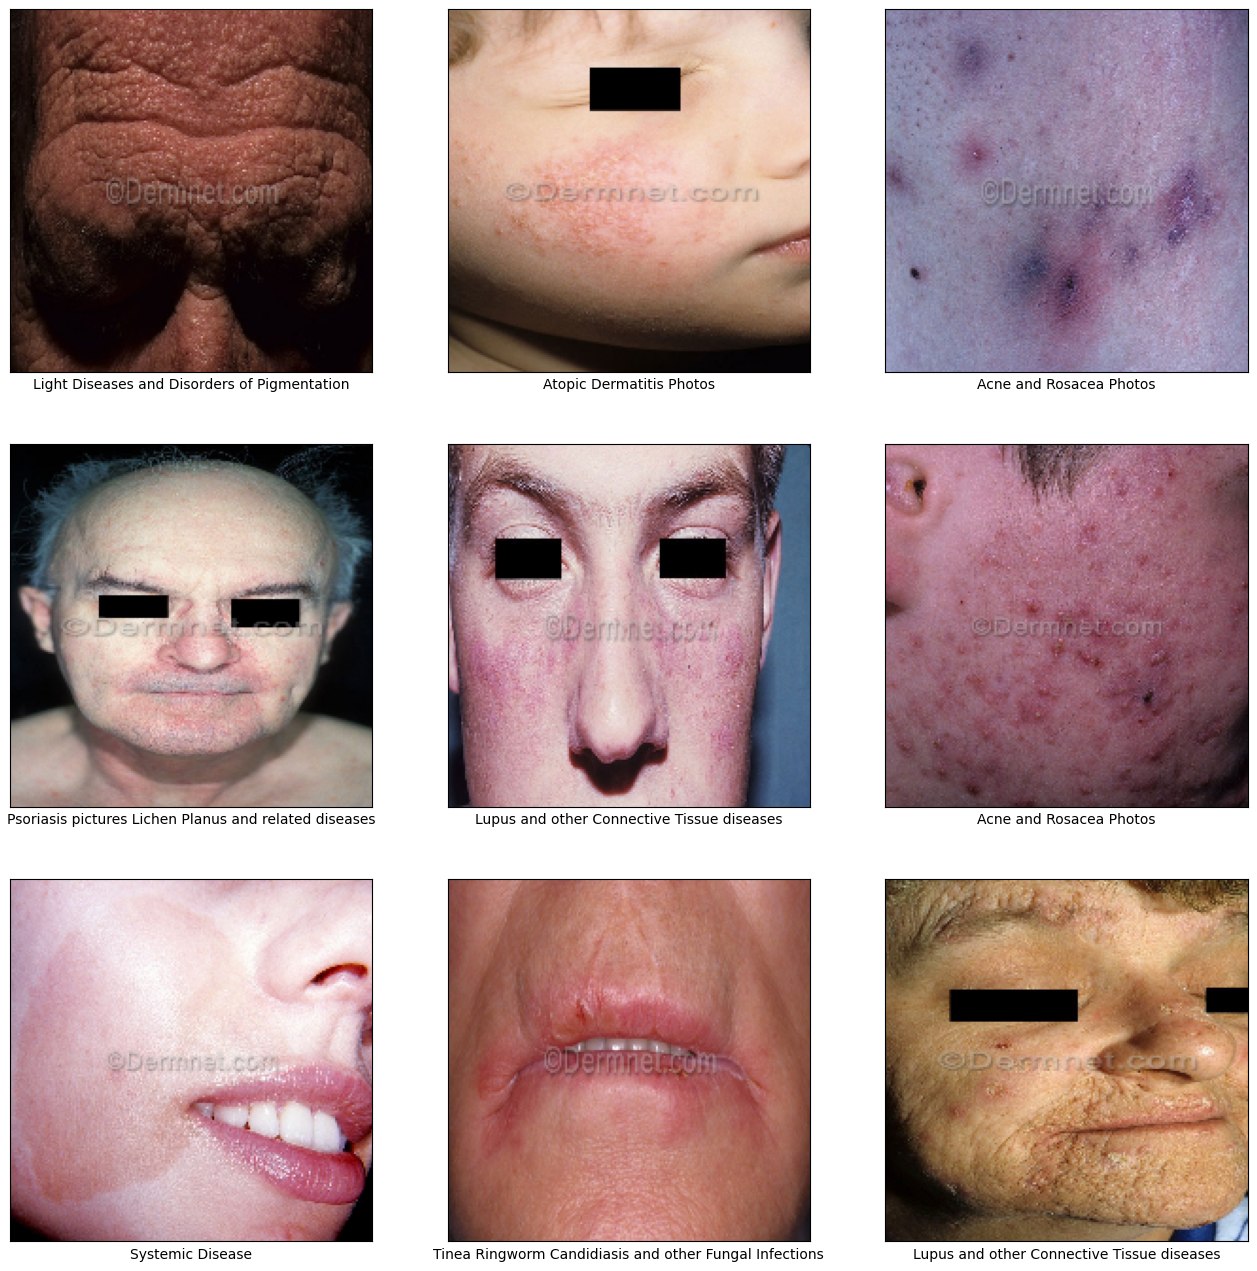

In [8]:
#CRN4TWW https://www.kaggle.com/code/crn4tww/cnn-cheetahs-and-lions-classifier

from random import randint

fig, axs = plt.subplots(3, 3, figsize=(16, 16))#Original was 10,6

for x in range(3):
    for y in range(3):
        i = randint(0, len(images))
        
        axs[x][y].imshow(images[i])
        
                    
        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(class_names[np.argmax(labels[i])])
        
        
plt.show()

In [9]:
#CRN4TWW https://www.kaggle.com/code/crn4tww/dog-emotions-classifier

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.15, random_state=42)

print(f'train images shape: {X_train.shape}\ntrain labels shape: {y_train.shape}\n\nvalidation images shape: {X_val.shape}\nvalidation labels shape: {y_val.shape}\n')

train images shape: (2202, 192, 192, 3)
train labels shape: (2202, 17)

validation images shape: (389, 192, 192, 3)
validation labels shape: (389, 17)



#CNN Model

In [11]:
#CRN4TWW https://www.kaggle.com/code/crn4tww/dog-emotions-classifier

import tensorflow as tf

cnn_model = tf.keras.Sequential()

# Inputs and rescaling
cnn_model.add(tf.keras.layers.Rescaling(scale=1. / 255, input_shape=(img_size)))

# Convolutional block 1
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
# cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 2
cnn_model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 3
cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 4
cnn_model.add(tf.keras.layers.Conv2D(512, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(512, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
cnn_model.add(tf.keras.layers.Flatten())

# Dense block
cnn_model.add(tf.keras.layers.Dense(256, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(128, activation='relu'))
# cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))


cnn_model.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy','precision'])

cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 192, 192, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 192, 192, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 96, 96, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 96, 96, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 96, 96, 128)         │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 48, 48, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 48, 48, 256)         │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 48, 48, 256)         │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 24, 24, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 24, 24, 512)         │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 24, 24, 512)         │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │      18,874,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 17)                  │           2,193 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,977,681 (80.02 MB)

 Trainable params: 20,977,681 (80.02 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#CRN4TWW https://www.kaggle.com/code/crn4tww/dog-emotions-classifier

from tensorflow.keras.callbacks import ModelCheckpoint

# creating ModelChecpoint callback
checkpoint_callback = ModelCheckpoint('cnn_model1/model{epoch:02d}.keras')

#Epochs 20

In [13]:
history = cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[checkpoint_callback])

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 563s 8s/step - accuracy: 0.3078 - loss: 2.4534 - precision: 0.3749 - val_accuracy: 0.3188 - val_loss: 2.3466 - val_precision: 0.0000e+00
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 544s 8s/step - accuracy: 0.3253 - loss: 2.2957 - precision: 0.4406 - val_accuracy: 0.3290 - val_loss: 2.3036 - val_precision: 0.0000e+00
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 521s 8s/step - accuracy: 0.3241 - loss: 2.2302 - precision: 0.4614 - val_accuracy: 0.3136 - val_loss: 2.2673 - val_precision: 0.7500
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 555s 8s/step - accuracy: 0.3590 - loss: 2.1432 - precision: 0.5321 - val_accuracy: 0.3085 - val_loss: 2.2534 - val_precision: 0.6667
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 531s 8s/step - accuracy: 0.3884 - loss: 2.0520 - precision: 0.5868 - val_accuracy: 0.3239 - val_loss: 2.2050 - val_precision: 0.7500
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 534s 8s/step - accuracy: 0.4034 - loss: 1.9465 - precision: 0.5845 - val_accuracy: 0.3393 - val_los

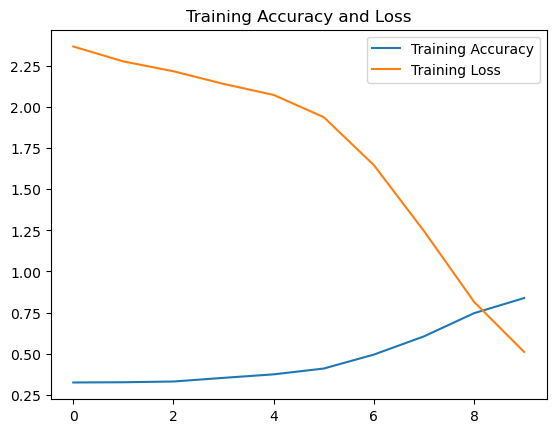

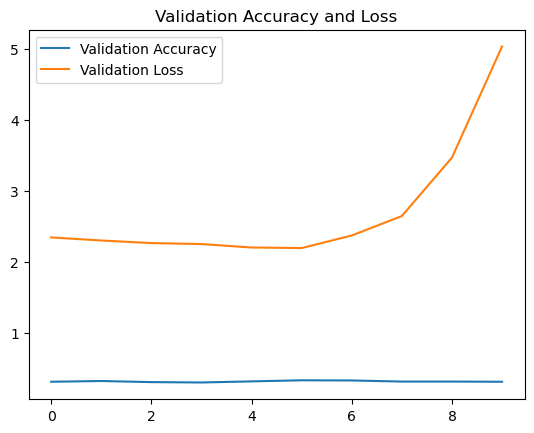

In [14]:
#CRN4TWW https://www.kaggle.com/code/crn4tww/dog-emotions-classifier

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.figure()
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, loss, label='Training Loss')
plt.legend()
plt.title('Training Accuracy and Loss')

plt.figure()
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.title('Validation Accuracy and Loss')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


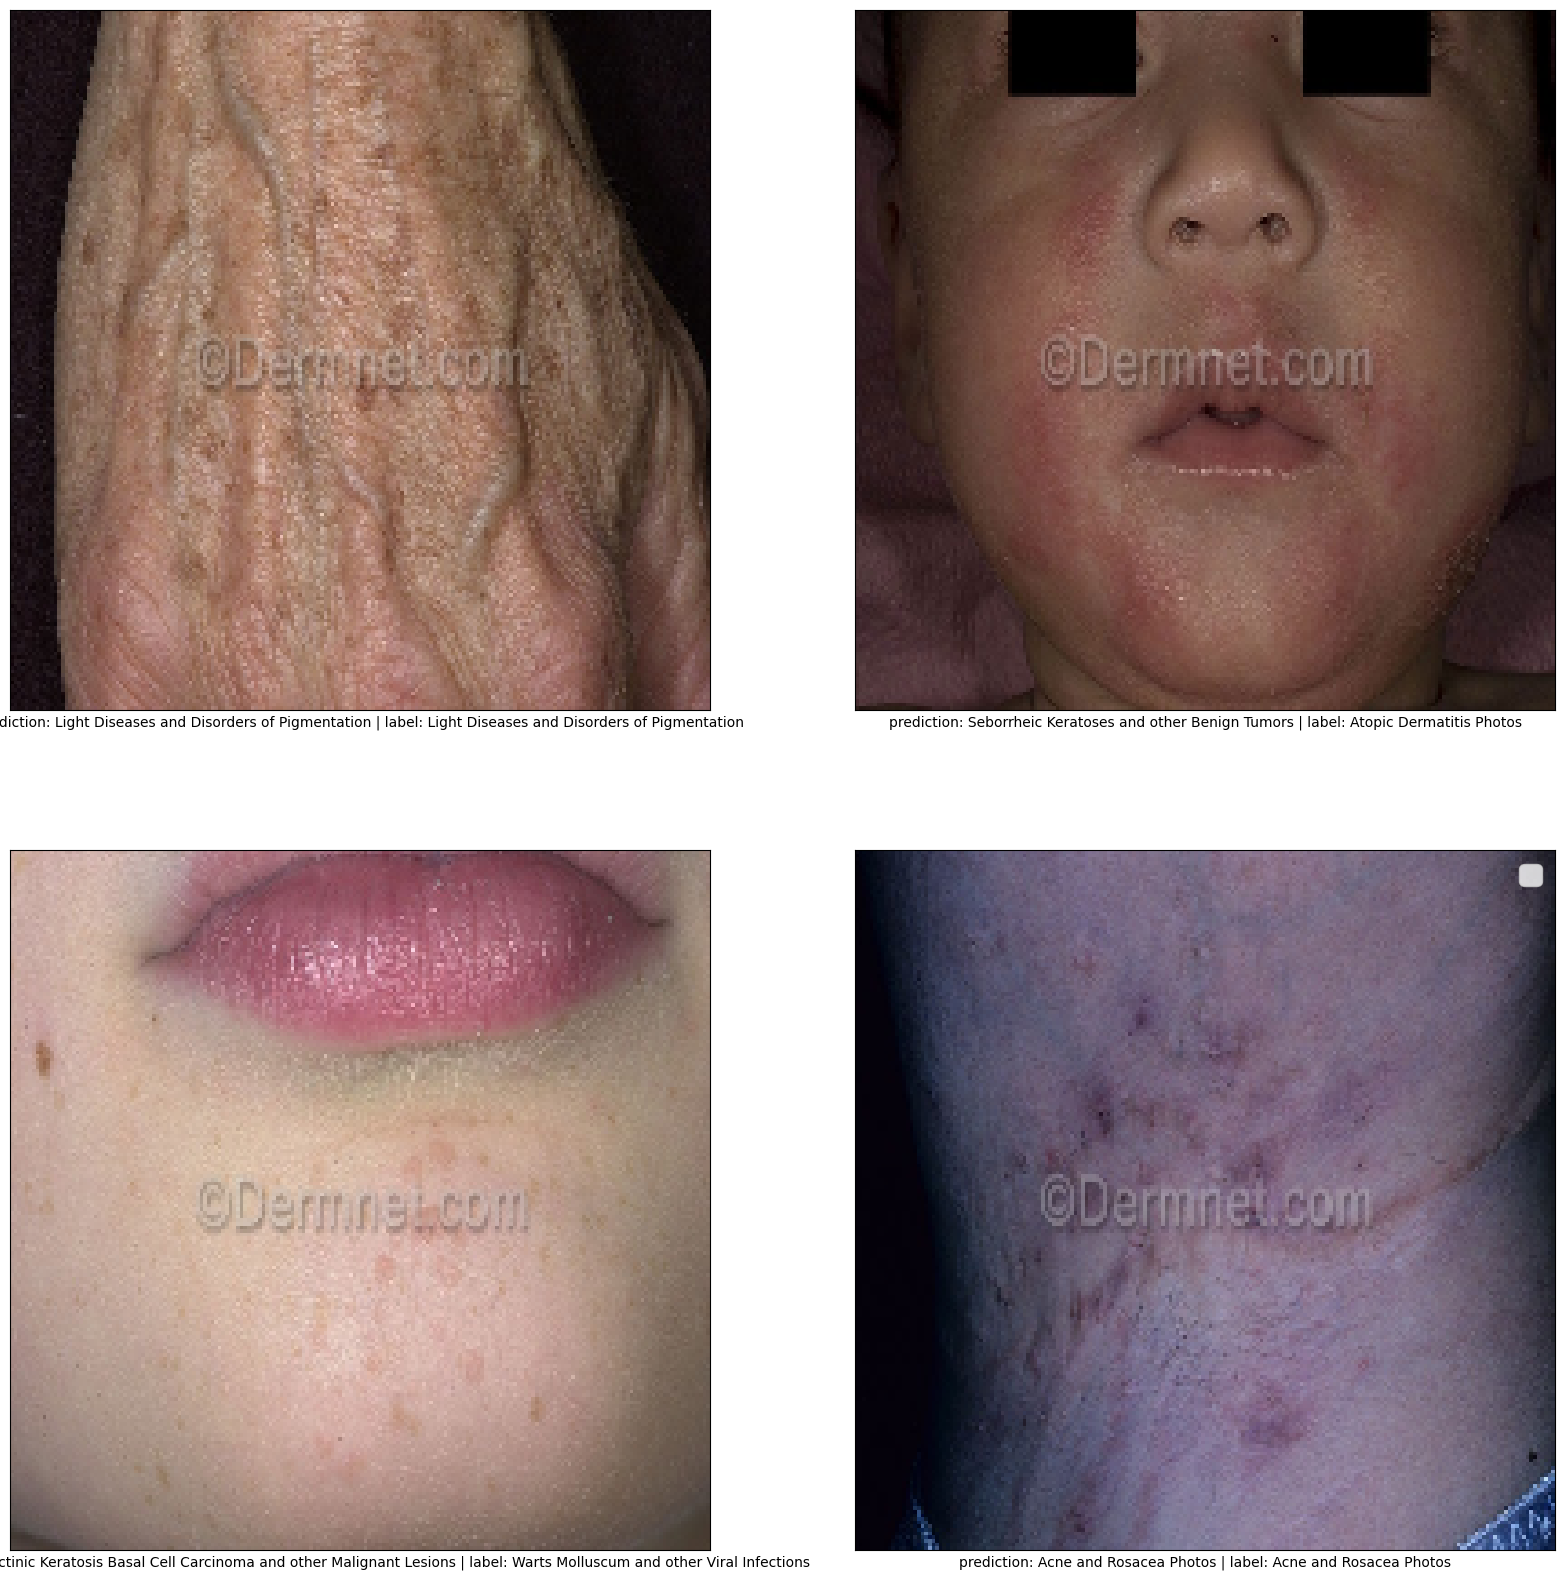

In [15]:
#CRN4TWW https://www.kaggle.com/code/crn4tww/dog-emotions-classifier

fig, axs = plt.subplots(2, 2, figsize=(20, 20))#Original was 7,4 (28 is higher than 25) and figsize 15,15
plt.legend(fontsize="20")#I can't read any of them

i = 0
for x in range(2): #Original was 7 so resulted in error 7X4 = 28
    for y in range(2):
        prediction = cnn_model.predict(X_val[i][None, ...], verbose=0)[0],
       
        
        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(f'prediction: {class_names[np.argmax(prediction)]} | label: {class_names[np.argmax(y_val[i])]}')
        
        axs[x][y].imshow(X_val[i])
        
        i += 1
plt.show()


Above, that was the only size that I could read the legends.
More images, the letters were so tiny.

#Acknowledgements:

mpwolke https://www.kaggle.com/code/mpwolke/avoid-opencv2-blue-images

mpwolke https://www.kaggle.com/code/mpwolke/monkeys-cnn-classifier#CNN-(Convolutional-Neural-Network)

mpwolke https://www.kaggle.com/code/mpwolke/coral-snake-cnn

CRN4TWW https://www.kaggle.com/code/crn4tww/dog-emotions-classifier

CRN4TWW https://www.kaggle.com/code/crn4tww/cnn-cheetahs-and-lions-classifier

In [16]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

In [17]:
cnn_model.save('modelepoch10.h5')
print('Model Saved!')

Model Saved!


In [18]:
cnn_model.save_weights('modelepoch10.weights.h5')
print('Model Saved!')

Model Saved!


In [19]:
cnn_model.save('gfgModelWeights.keras')
print('Model Saved!')

Model Saved!


In [49]:
path = r"C:\Users\2021i\Downloads\skin\Dataset\test\Light Diseases and Disorders of Pigmentation\sun-damaged-skin-113.jpg"
image = np.asarray(cv2.resize(cv2.imread(path, cv2.IMREAD_COLOR), (192,192))[:, :, ::-1])
prediction = cnn_model.predict(image[None, ...], verbose=0)[0]
class_names = ['Acne and Rosacea Photos',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Atopic Dermatitis Photos',
 'Cellulitis Impetigo and other Bacterial Infections',
 'Eczema Photos',
 'Exanthems and Drug Eruptions',
 'Herpes HPV and other STDs Photos',
 'Light Diseases and Disorders of Pigmentation',
 'Lupus and other Connective Tissue diseases',
 'Melanoma Skin Cancer Nevi and Moles',
 'Poison Ivy Photos and other Contact Dermatitis',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Seborrheic Keratoses and other Benign Tumors',
 'Systemic Disease',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Urticaria Hives',
 'Vascular Tumors',
 'Vasculitis Photos',
 'Warts Molluscum and other Viral Infections']
print(f'prediction: {class_names[np.argmax(prediction)]}')

prediction: Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions


In [50]:
np.argmax(prediction)

1

In [57]:
model.save('final.h5')

In [51]:
import cv2
from skimage import io, transform
img_size = (192, 192, 3)

# fig, axs = plt.subplots(2, 2, figsize=(20, 20))#Original was 7,4 (28 is higher than 25) and figsize 15,15
# plt.legend(fontsize="20")#I can't read any of them

i = 0
path = r"C:\Users\2021i\Downloads\skin\Dataset\train\Herpes HPV and other STDs Photos\AIDS-7.jpg"
image = np.asarray(cv2.resize(cv2.imread(path , cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1])/255
#image = np.asarray(transform.resize(io.imread(path), img_size[0:2])[:, :, ::-1])
prediction = cnn_model.predict(image[None, ...], verbose=0)[0],
print(prediction)

(array([1.11054797e-02, 1.00244582e-03, 6.90593697e-06, 1.18208155e-01,
       2.16445210e-03, 2.64827628e-03, 1.13173749e-03, 5.35264552e-01,
       1.55236602e-01, 2.92929093e-04, 1.89180762e-04, 2.00553419e-04,
       9.94446650e-02, 4.07132984e-06, 5.22823725e-03, 2.02290496e-04,
       6.76695183e-02], dtype=float32),)


In [52]:
print(f'prediction: {class_names[np.argmax(prediction)]}')

prediction: Light Diseases and Disorders of Pigmentation
